In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
df=pd.read_csv('/content/drive/MyDrive/MLOPS/dataset/kindey stone urine analysis.csv')
df=df.dropna()
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [3]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [18]:
X=df[['gravity','osmo','cond','urea','calc']]
y=df['target']
y_labels = to_categorical(y, num_classes=2)

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_labels, test_size=0.2, random_state=50)
model = Sequential([
    Dense(20, activation='relu', input_dim=5),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4272 - loss: 0.6945 - val_accuracy: 0.5625 - val_loss: 0.6831
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6527 - loss: 0.6548 - val_accuracy: 0.6250 - val_loss: 0.6657
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6919 - loss: 0.6812 - val_accuracy: 0.6250 - val_loss: 0.6537
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7519 - loss: 0.6391 - val_accuracy: 0.6250 - val_loss: 0.6412
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6917 - loss: 0.6393 - val_accuracy: 0.6250 - val_loss: 0.6308
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7347 - loss: 0.6142 - val_accuracy: 0.6250 - val_loss: 0.6199
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6784 - loss: 0.6211 - val_accuracy: 0.6250 - val_loss: 0.6092
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7161 - loss: 0.6052 - val_accuracy: 0.6250 - val_loss: 0.5997


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8125 - loss: 0.5414
Test Accuracy: 0.8125


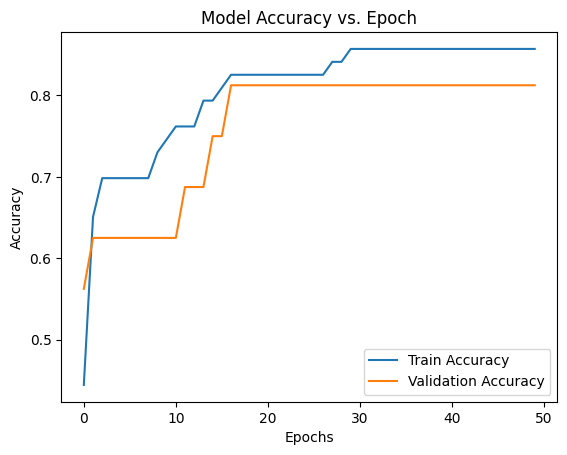

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
import matplotlib.pyplot as plt
plt.plot(mlp.history['accuracy'], label='Train Accuracy')
plt.plot(mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Epoch')
plt.legend()
plt.show()

In [22]:
y_pred_probs = model.predict(X_test)  #  probability distributions
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [23]:
# Convert y_test from one-hot to class labels
y_test_classes = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



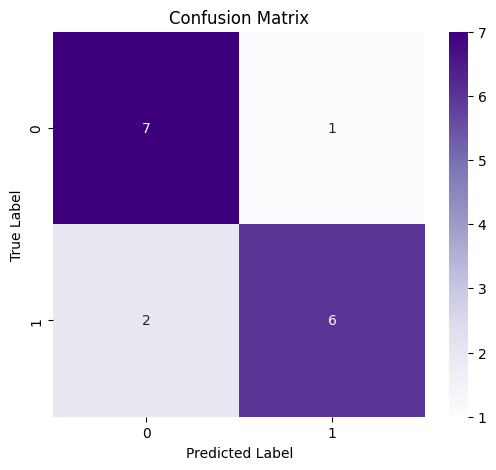

In [24]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
import joblib
from tensorflow.keras.models import load_model
model.save("mlp_kidney.h5")

In [26]:
new = np.array([2.028,853,2.4,1,0.7]).reshape(1, -1)
loaded_model= load_model("mlp_kidney.h5")
p=loaded_model.predict([new])
p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=('Tensor(shape=(1, 5))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[0., 1.]], dtype=float32)

In [27]:
y_pred_class = np.argmax(p, axis=1)
y_pred_class

array([1])

In [28]:
classes={0:"Absent",1:"Present"}
print(f"Predicted class: {classes[y_pred_class[0]]}")

Predicted class: Present
